# Introduction to Random Forests - The forests which are so random you dont know which tree will hit you
Welcome to the whimsical world of Random Forests, the ultimate team players of machine learning! Imagine you're trying to make the most crucial decision of your life, like picking a movie to watch on Netflix, and you have a committee of decision-makers—each with slightly different tastes but collectively smarter than any single one. That's Random Forest for you, an ensemble method that combines the wisdom of multiple decision trees to make decisions better than your indecisive friend ever could.

Why use Random Forests instead of keeping it simple with KNN? Well, Random Forests are like the Avengers of algorithms—more robust, less prone to embarrassing themselves by overfitting, and excellent at handling both classification and regression tasks without breaking a sweat. They work by building a bunch of decision trees on bootstrapped training samples, then averaging or 'majority ruling' their predictions to decide on the most democratic outcome. This process not only increases accuracy but also helps in understanding feature importance—like figuring out which movie genre influences your mood the most on a Friday night.

Let's dive into this forest and see what treasures we can find (or at least get a decent decision boundary out of it).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load and Visualize the Iris Dataset
Here we go again, loading the same old Iris dataset. This time let's visualize it in ways that make the numbers jump out at you, begging for understanding.

In [6]:
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


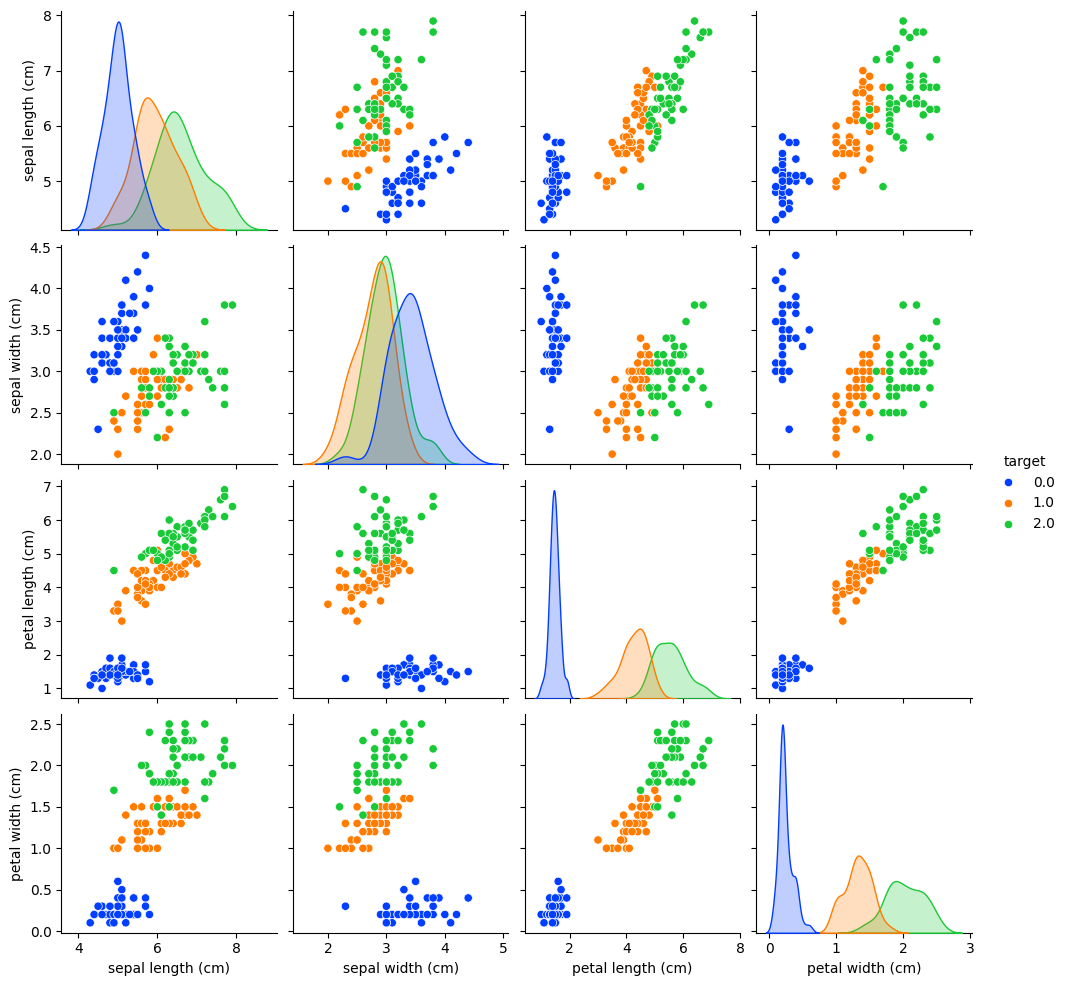

In [7]:
# Pairplot to see the interactions between features
sns.pairplot(iris_df, hue='target', palette='bright')
plt.show()


# What is a Pairplot and Why Did We Use It?
A pairplot is like a speed-dating session for data features. It allows each feature (like sepal length, petal width, etc.) to meet and mingle with every other feature, creating scatterplots for their relationships. Diagonal plots show the distribution of each feature, while the off-diagonal plots compare how one feature varies against another.

Why did we use it? Well, we wanted to visually confirm if any patterns or clusters existed between different Iris species. As you can see, some feature pairs do a nice job of separating the species (like petal length vs. petal width), while others, not so much (looking at you, sepal width).

In short, it's a colorful way to figure out how well features can help us classify things, and to make sure we're not missing out on any obvious patterns.

# Explaining the Pairplot
This pairplot visualizes the relationships between the four features of the Iris dataset (sepal length, sepal width, petal length, and petal width). Each point represents a flower, color-coded by its species (blue, orange, and green).

Diagonal plots: These show the distribution of each feature individually (like sepal length), providing insights into how data is spread within each species.

Off-diagonal plots: These compare the relationship between two features. For example, petal length vs. petal width shows clear separation between the species, while sepal width vs. sepal length is a bit more chaotic, with more overlap.

In short, the pairplot helps us see which feature combinations separate the species well (and which ones don't), guiding us on which features are more relevant for classification.

# Data Preparation
Just like you can't bake a cake without prepping your ingredients, you can't run a Random Forest without splitting your data into training and testing sets. Let's slice and dice

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)